### Обучение с учителем 

> Есть два основные задачи машинного обучения с учителем: **классификация(classification)** и **регрессия (regression)**.

> Цель классификации состоит в том, чтобы спрогнозировать метку класса (class label), которая представляет собой выбор из заранее определенного списка возможных вариантов. Классификация иногда разделяется на бинарную классификацию (binary classification), которая является частным случаем разделения на два класса, и мультиклассовую классификацию (multiclass classification), когда в классификации участвует более двух классов.
Бинарную классификацию можно представить как попытку ответить на поставленный вопрос в формате «да/нет». 

> В бинарной классификации мы часто говорим о том, что один класс является положительным (positive) классом, а другой класс является отрицательным (negative) классом. При этом «положительный» означает здесь не наличие выгоды (ценности), а объект исследования

> Цель регрессии состоит в том, чтобы спрогнозировать непрерывное число или число с плавающей точкой (floating-point number), если использовать термины программирования, или вещественное число (real number), если говорить языком математических терминов. Прогнозирование годового дохода человека в зависимости от его образования, возраста и места жительства является примером регрессионной задачи. Прогнозируемое значение дохода представляет собой сумму (amount) и может быть любым числом в заданном диапазоне. Другой пример регрессионной задачи – прогнозирование объема урожая зерна на ферме в зависимости от таких атрибутов, 
как объем предыдущего урожая, погода, и количество сотрудников, работающих на ферме. И снова объем урожая может быть любым числом.

> Самый простой способ отличить классификацию от регрессии – спросить, заложена ли в полученном ответе определенная непрерывность (преемственность). Если полученные результаты непрерывно связаны друг с другом, то решаемая задача является задачей регрессии. Возьмем прогнозирование годового дохода. Здесь ясно видна непрерывность ответа. Разница между годовым доходом в 40000 или 40001 не существенна, хотя речь идет о разных денежных суммах. Если наш алгоритм предсказывает 39999 или 40001, в то время как он должен предсказать 40000 (реальное значение годового дохода), мы не будем настаивать на том, что разница существенна

> В машинном обучении с учителем нам нужно построить модель на обучающих данных, а затем получить точные прогнозы для новых, еще не встречавшихся нам данных, которые имеют те же самые характеристики, что и использованный нами обучающий набор. Если модель может выдавать точные прогнозы на ранее не встречавшихся данных, мы говорим, что модель обладает способностью обобщать (generalize) результат на тестовые данные. Нам необходимо построить модель, которая будет обладать максимальной обобщающей способностью.
> Обычно мы строим модель таким образом, чтобы она давала точные прогнозы на обучающем наборе. Если обучающий и тестовый наборы имеют много общего между собой, можно ожидать, что модель будет точной и на тестовом наборе. Однако в некоторых случаях этого не происходит.

In [1]:
import pandas as pd
import numpy as np 
import seaborn  as sns
import matplotlib.pyplot as plt

%matplotlib inline 
sns.set('notebook')


In [34]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [3]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris.columns


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [5]:
iris.shape

(150, 5)

In [6]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
iris.sample(15)

,sepal_length,sepal_width,petal_length,petal_width,species
10,5.4,3.7,1.5,0.2,setosa
130,7.4,2.8,6.1,1.9,virginica
135,7.7,3.0,6.1,2.3,virginica
56,6.3,3.3,4.7,1.6,versicolor
25,5.0,3.0,1.6,0.2,setosa
16,5.4,3.9,1.3,0.4,setosa
27,5.2,3.5,1.5,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
126,6.2,2.8,4.8,1.8,virginica


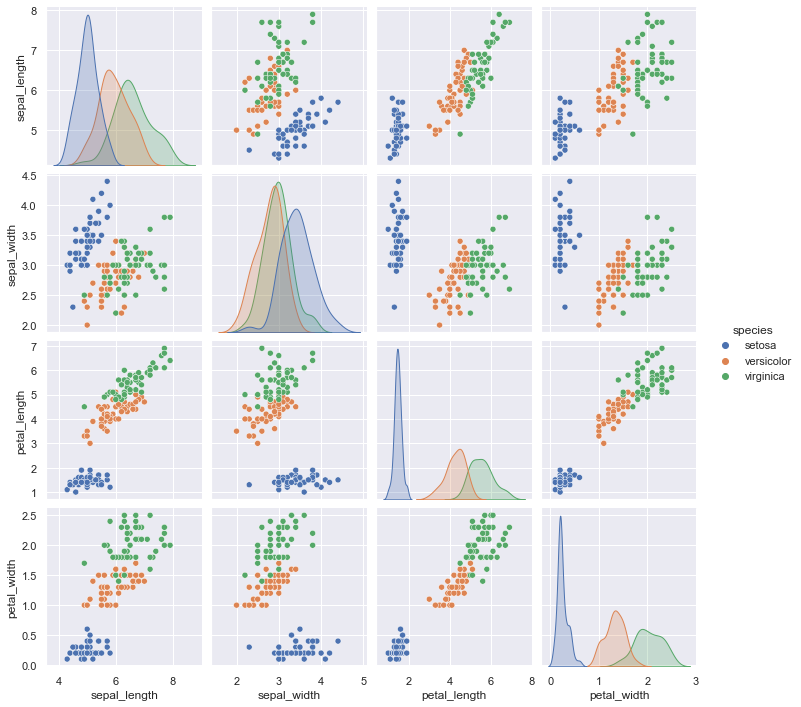

In [8]:
sns.pairplot(iris, hue = 'species');

In [9]:
iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [21]:
X = iris.drop(['species'], axis=1)
y = iris['species']

print(X.shape)

print(y.shape)

(150, 4)
(150,)


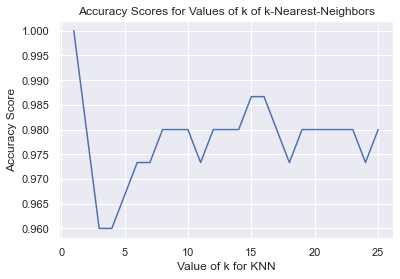

In [14]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    scores.append(metrics.accuracy_score(y, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [25]:
knn = KNeighborsClassifier(n_neighbors = 15)

knn.fit(X, y)
y_pred = knn.predict(X)
knn.predict([[7.3, 3.313, 4.56, 1.45]])
print(metrics.accuracy_score(y, y_pred))

0.9866666666666667


/usr/local/Cellar/jupyterlab/3.4.3/libexec/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


> В принципе, в классификаторе KNeighbors есть два важных параметра: количество соседей и мера расстояния между точками данных. На практике использование небольшого числа соседей (например, 3-5) часто работает хорошо, но вы, конечно, можете самостоятельно настроить этот параметр. По умолчанию используется евклидово расстояние, которое хорошо работает во многих ситуациях.

> Одним из преимуществ метода ближайших соседей является то, что эту модель очень легко интерпретировать и, как правило, этот метод дает приемлемое качество без необходимости использования большого количества настроек. Он является хорошим базовым алгоритмом, который нужно попробовать в первую очередь, прежде чем рассматривать более сложные методы. 

> Как правило, построение модели ближайших соседей происходит очень быстро, но, когда ваш обучающий набор очень большой (с точки зрения количества характеристик или количества наблюдений) получение прогнозов может занять некоторое время. 

> Данный метод не так хорошо работает, когда речь идет о наборах данных с большим количеством признаков (сотни и более), и особенно плохо работает в ситуации, когда подавляющее число признаков в большей части наблюдений имеют нулевые значения (так называемые разреженные наборы данных или sparse datasets).

> Таким образом, несмотря на то что алгоритм ближайших соседей легко интерпретировать, на практике он не часто используется из-за скорости вычислений и его неспособности обрабатывать большое количество признаков.

### Линейные модели 
> Линейные модели представляют собой класс моделей, которые широко используются на практике. 

> Линейные модели дают прогноз, используя линейную функцию (linear function) входных признаков


> Линейная регрессия или обычный метод наименьших квадратов (ordinary least squares, OLS) – это самый простой и наиболее традиционный метод регрессии. Линейная регрессия находит параметры w и b, которые минимизируют среднеквадратическую ошибку (mean squared error) между спрогнозированными и фактическими ответами у в обучающем наборе. Среднеквадратичная ошибка равна сумме квадратов разностей между спрогнозированными и фактическими значениями. 

> Линейная регрессия проста, что является преимуществом, но в то же время у нее нет инструментов, позволяющих контролировать сложность модели.

In [192]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)


#### Параметры «наклона» (w), также называемые весами или коэффициентами (coefficients), хранятся в атрибуте coef_, тогда как сдвиг (offset) или константа (intercept), обозначаемая как b, хранится в атрибуте intercept_


In [172]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


> Атрибут intercept_ - это всегда отдельное число с плавающей точкой, тогда как атрибут coef_ - это массив NumPy, в котором каждому элементу соответствует входной признак. 

> Поскольку в наборе данных wave используется только один входной признак, lr.coef_ содержит только один элемент.

In [195]:
import mglearn

In [193]:
print("Правильность на обучающем наборе: {:.2f}".format(lr.score(X_train, y_train))) 
print("Правильность на тестовом наборе: {:.2f}".format(lr.score(X_test, y_test)))


Правильность на обучающем наборе: 0.67
Правильность на тестовом наборе: 0.66


### Boston Housing

In [199]:
from mglearn.datasets import load_extended_boston
X, y = load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 
lr = LinearRegression().fit(X_train, y_train)

/usr/local/Cellar/jupyterlab/3.4.3/libexec/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the 

In [176]:
print("Правильность на обучающем наборе: {:.2f}".format(lr.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(lr.score(X_test, y_test)))

Правильность на обучающем наборе: 0.95
Правильность на тестовом наборе: 0.61


> Это несоответствие между правильностью на обучающем наборе и правильностью на тестовом наборе является явным признаком переобучения и поэтому мы должны попытаться найти модель, которая позволит нам контролировать сложность.

> Одна из наиболее часто используемых альтернатив стандартной линейной регрессии – гребневая регрессия, которую мы рассмотрим ниже.

> Гребневая регрессия11 также является линейной моделью регрессии, поэтому ее формула аналогична той, что используется в обычном методе наименьших квадратов. В гребневой регрессии коэффициенты (w) выбираются не только с точки зрения того, насколько хорошо они позволяют предсказывать на обучающих данных, они еще подгоняются в соответствии с дополнительным ограничением. Нам нужно, чтобы величина коэффициентов была как можно меньше. 

> Другими словами, все элементы w должны быть близки к нулю. Это означает, что каждый признак должен иметь как можно меньшее влияние на результат (то есть каждый признак должен иметь небольшой регрессионный коэффициент) и в то же время он должен по-прежнему обладать хорошей прогнозной силой. Это ограничение является примером регуляризации (regularization). Регуляризация означает явное ограничение модели для предотвращения переобучения. Регуляризация, использующаяся в гребневой регрессии, известна как L2 регуляризация.

> Гребневая регрессии реализована в классе linear_model.Ridge

In [201]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(ridge.score(X_train, y_train))) 
print("Правильность на тестовом наборе: {:.2f}".format(ridge.score(X_test, y_test)))


Правильность на обучающем наборе: 0.89
Правильность на тестовом наборе: 0.75


> Ridge – модель с более строгим ограничением, поэтому меньше вероятность переобучения. Менее сложная модель означает меньшую правильность на обучающем наборе, но лучшую обобщающую способность. Поскольку нас интересует только обобщающая способность, мы должны выбрать модель Ridge вместо модели LinearRegression.

> Модель Ridge позволяет найти компромисс между простотой модели (получением коэффициентов, близких к нулю) и качеством ее работы на обучающем наборе. Компромисс между простотой модели и качеством работы на обучающем наборе может быть задан пользователем при помощи параметра alpha. 

> В предыдущем примере мы использовали значение параметра по умолчанию alpha=1.0. Впрочем, нет никаких причин считать, что это даст нам оптимальный компромиссный вариант. Оптимальное значение alpha зависит от конкретного используемого набора данных. Увеличение alpha заставляет коэффициенты сжиматься до близких к нулю значений, что снижает качество работы модели на обучающем наборе, но может улучшить ее обобщающую способность.

In [211]:
ridge10 = Ridge(alpha = .5).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(ridge10.score(X_train, y_train))) 
print("Правильность на тестовом наборе: {:.2f}".format(ridge10.score(X_test, y_test)))

Правильность на обучающем наборе: 0.90
Правильность на тестовом наборе: 0.77


In [216]:
X, y = load_extended_boston()
print(len(X[0]), y[0])

104 24.0


/usr/local/Cellar/jupyterlab/3.4.3/libexec/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the 

### Lasso
> Альтернативой Ridge как метода регуляризации линейной регрессии является Lasso. Как и гребневая регрессия, лассо также сжимает коэффициенты до близких к нулю значений, но несколько иным способом, называемым L1 регуляризацией.

> Результат L1 регуляризации заключается в том, что при использовании лассо некоторые коэффициенты становятся равны точно нулю. Получается, что некоторые признаки полностью исключаются из модели. Это можно рассматривать как один из видов автоматического отбора признаков. Получение нулевых значений для некоторых коэффициентов часто упрощает интерпретацию модели и может выявить наиболее важные признаки вашей модели.

In [212]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(lasso.score(X_train, y_train))) 
print("Правильность на контрольном наборе: {:.2f}".format(lasso.score(X_test, y_test))) 
print("Количество использованных признаков: {}".format(np.sum(lasso.coef_ != 0)))

Правильность на обучающем наборе: 0.29
Правильность на контрольном наборе: 0.21
Количество использованных признаков: 4


In [220]:
lasso001 = Lasso(alpha = 0.01, max_iter = 100000).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(lasso001.score(X_train, y_train))) 
print("Правильность на тестовом наборе: {:.2f}".format(lasso001.score(X_test, y_test))) 
print("Количество использованных признаков: {}".format(np.sum(lasso001.coef_ != 0)))


Правильность на обучающем наборе: 0.90
Правильность на тестовом наборе: 0.77
Количество использованных признаков: 33


> Более низкое значение alpha позволило нам получить более сложную модель, которая продемонстрировала более высокую правильность на обучающем и тестовом наборах. Лассо работает немного лучше, чем гребневая регрессия, и мы используем лишь 33 признака из 105. Это делает данную модель более легкой с точки зрения интерпретации.

> Однако, если мы установим слишком низкое значение alpha, мы снова нивелируем эффект регуляризации и получим в конечном итоге переобучение, придя к результатам, аналогичным результатам линейной регрессии.


### Гаусовский Наивный Байеса(генаративная модель)
[Подробное описание алгоритма](https://coderlessons.com/tutorials/python-technologies/uznaite-mashinnoe-obuchenie-s-python/algoritmy-klassifikatsii-naivnyi-baies)

In [221]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 1) # для ирисов Фишера 

In [36]:
from sklearn.naive_bayes import GaussianNB # 1. Выбираем класс модели
from sklearn.naive_bayes import GaussianNB # 1. Выбираем класс модели

model = GaussianNB() # 2. Инстанцируем модель 
model.fit(x_train, y_train) # 3. Скормливаем данные 
y_model = model.predict(x_test) # 4.  Делаем прогноз 
model = GaussianNB() # 2. Инстанцируем модель 
model.fit(x_train, y_train) # 3. Скормливаем данные 
y_model = model.predict(x_test) # 4.  Делаем прогноз 

In [37]:
accuracy_score(y_test, y_model)

0.9736842105263158

In [187]:
#digits

In [222]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.images.shape

(1797, 8, 8)

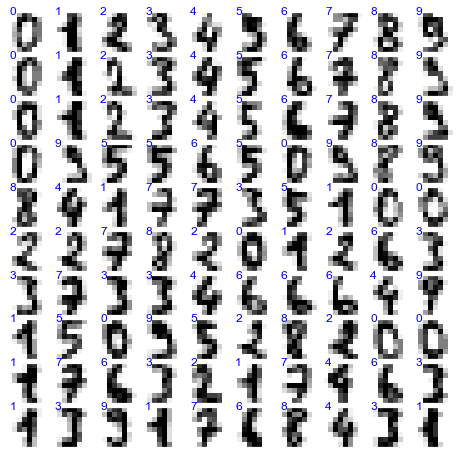

In [223]:
fix, axes = plt.subplots(10, 10 , figsize = (8,8),
                        subplot_kw = { 'xticks': [],
                                     'yticks':[]},
                        gridspec_kw = dict(hspace = 0.1, wspace = 0.1)
                       )

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap = 'binary', interpolation = 'nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), color = 'blue')

In [58]:
X_dig = digits.data
X.shape

(1797, 64)

In [60]:
y_dig = digits.target
y_dig.shape

(1797,)

In [48]:
from sklearn.manifold import Isomap 

iso = Isomap(n_neighbors= 10, n_components= 2) # в двумерноепростра
data_projected = iso.fit_transform(digits.data)
data_projected.shape

(1797, 2)

In [49]:
data_projected

array([[ 99.17596709, -30.25115863],
       [-28.06809366,  47.0227846 ],
       [-33.62018277,   2.83802887],
       ...,
       [-42.72442689,   0.16625825],
       [-31.17822207, -53.00903424],
       [-20.85910037, -28.67013357]])

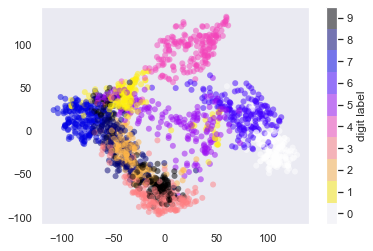

In [57]:
plt.scatter(data_projected[:, 0], data_projected[:, 1],
           c = digits.target, edgecolors= 'none', alpha= .5,
           cmap = plt.cm.get_cmap('gnuplot2_r', 10))
    
plt.rcParams['axes.grid'] = False
plt.colorbar(label = 'digit label', ticks = range(10))
plt.clim(-.5, 9.5)

In [226]:
X_train_d, x_test_d, Y_train_d, y_test_d = train_test_split(X_dig, y_dig, random_state= 0)

In [228]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train_d, Y_train_d)
y_model = model.predict(x_test_d)

In [229]:
accuracy_score(y_test_d, y_model)

0.8333333333333334

Text(89.18, 0.5, 'true value')

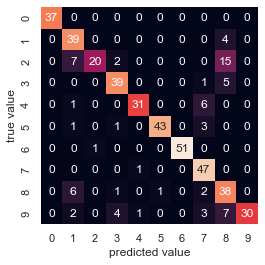

In [69]:
from sklearn.metrics import confusion_matrix # матрица не точности

mat = confusion_matrix(y_test_d, y_model)

sns.heatmap(mat, square= True, annot= True, cbar = False)
plt.xlabel('predicted value')
plt.ylabel('true value')

In [77]:
from sklearn.linear_model import LinearRegression
import mglearn
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)


In [80]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


> Атрибут intercept_ - это всегда отдельное число с плавающей точкой, тогда как атрибут coef_ - это массив NumPy, в котором каждому элементу соответствует входной признак. 

> Поскольку в наборе данных wave используется только один входной признак, lr.coef_ содержит только один элемент.

In [81]:
print("Правильность на обучающем наборе: {:.2f}".format(lr.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(lr.score(X_test, y_test)))


Правильность на обучающем наборе: 0.67
Правильность на тестовом наборе: 0.66


In [87]:
X_boston, y_boston = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 
lr1 = LinearRegression().fit(X_train, y_train)

/usr/local/Cellar/jupyterlab/3.4.3/libexec/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the 

In [94]:
ds = mglearn.datasets.load_extended_boston()
ds

/usr/local/Cellar/jupyterlab/3.4.3/libexec/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the 

(array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
         1.00000000e+00, 8.96799117e-02, 8.04248656e-03],
        [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
         1.00000000e+00, 2.04470199e-01, 4.18080621e-02],
        [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
         9.79579831e-01, 6.28144504e-02, 4.02790570e-03],
        ...,
        [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
         1.00000000e+00, 1.07891832e-01, 1.16406475e-02],
        [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
         9.82676920e-01, 1.29930407e-01, 1.71795127e-02],
        [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
         1.00000000e+00, 1.69701987e-01, 2.87987643e-02]]),
 array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7,

In [96]:
print("Правильность на обучающем наборе: {:.2f}".format(lr.score(X_train, y_train))) 
print("Правильность на тестовом наборе: {:.2f}".format(lr.score(X_test, y_test)))


Правильность на обучающем наборе: 0.95
Правильность на тестовом наборе: 0.61


In [97]:
### Ridge 
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(ridge.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(ridge.score(X_test, y_test)))

Правильность на обучающем наборе: 0.89
Правильность на тестовом наборе: 0.75


In [98]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(ridge10.score(X_train, y_train))) 
print("Правильность на тестовом наборе: {:.2f}".format(ridge10.score(X_test, y_test)))

Правильность на обучающем наборе: 0.79
Правильность на тестовом наборе: 0.64


In [101]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

> При очень малых значениях alpha, ограничение на коэффициенты практически не накладывается и мы в конечном итоге получаем модель, напоминающую линейную регрессию.

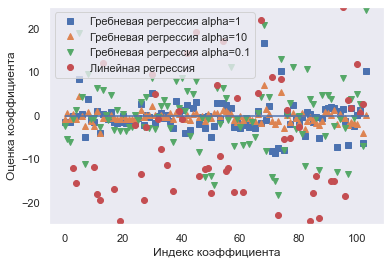

In [102]:
plt.plot(ridge.coef_, 's', label="Гребневая регрессия alpha=1") 
plt.plot(ridge10.coef_, '^', label="Гребневая регрессия alpha=10")
plt.plot(ridge01.coef_, 'v', label="Гребневая регрессия alpha=0.1")
plt.plot(lr.coef_, 'o', label="Линейная регрессия")
plt.xlabel("Индекс коэффициента") 
plt.ylabel("Оценка коэффициента")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()


In [ ]:
import sys

In [155]:
!{sys.executable} -m pip install pydotplus #pydotplus, mglearn 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.7/278.7 KB 2.3 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24575 sha256=6c2d266dc99c31ff9251741663c8def27a3ae0e0df7759f3c366a47fcad05532
  Stored in directory: /Users/alksandr/Library/Caches/pip/wheels/69/b2/67/08f0eef649af92df772c09f451558298e07fab1bc7cdf33db0
Successfully built pydotplus
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/3.4.3/libexec/bin/python3.10 -m pip install --upgrade pip' command.


### DecisionTreeClassifier 
> Деревья решений являются моделями, широко используемыми для решения задач классификации и регрессии. 
По сути они задают вопросы и выстраивают иерархию правил «если... то», приводящую к решению


In [257]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer

In [130]:
cancer_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
cancer_df['target'] = cancer.target

In [235]:
cancer_df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [245]:
cancer_df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [240]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [133]:
X_c = cancer.data
y_c = cancer.target

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c)

In [279]:
res = {}
for i in range(1, 100):
    logreg = KNeighborsClassifier(n_neighbors = 10)
    logreg.fit(X_train_c, y_train_c)
    
    res[i] =  logreg.score(X_test_c, y_test_c)
    

#for keys, value in res.items():
   # print(f'{keys} accuracy = {value}')


In [267]:
des_tree = DecisionTreeClassifier()
des_tree.fit(X_train_c, y_train_c)
des_tree.score(X_test_c, y_test_c)

0.9230769230769231

In [261]:
from sklearn.tree import DecisionTreeClassifier
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state = 42)

tree = DecisionTreeClassifier(random_state = 0)

tree.fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.3f}".format(tree.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(tree.score(X_test, y_test)))

Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.937


In [263]:
tree = DecisionTreeClassifier(max_depth = 4, random_state = 0) 
tree.fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(tree.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(tree.score(X_test, y_test)))


Правильность на обучающем наборе: 0.988
Правильность на тестовом наборе: 0.951


> Вместо того, чтобы просматривать все дерево, что может быть обременительно, есть некоторые полезные параметры, которые мы можем использовать как итоговые показатели работы дерева. Наиболее часто используемым показателем является важность признаков (feature importance), которая оценивает, насколько важен каждый признак с точки зрения получения решений. Это число варьирует в диапазоне от 0 до 1 для каждого признака, где 0 означает «не используется вообще», а 1 означает, что «отлично предсказывает целевую переменную». Важности признаков в сумме всегда дают 1:


Feature importances: [0. 1.]


ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

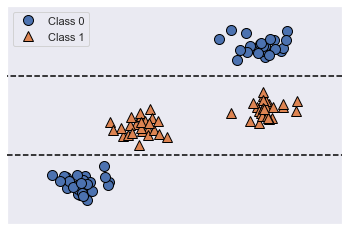

In [170]:
tree = mglearn.plots.plot_tree_not_monotone() 
display(tree);

In [148]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
feature_names=cancer.feature_names, impurity=False, filled=True)

In [152]:
import graphviz
with open("tree.dot") as f: dot_graph = f.read()
graphviz.Source(dot_graph);



In [157]:

from sklearn import tree
from sklearn.tree import export_graphviz
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=42) 
clf = tree.DecisionTreeClassifier(max_depth=4, random_state=0)
clf = clf.fit(X_train, y_train)
